Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [39]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [69]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [70]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Melanoma Folder/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Melanoma Folder/Test')

In [71]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [73]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [74]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory( data_dir_train, seed=123, image_size=(img_height,img_width),
                                                       batch_size=batch_size ) 


Found 2239 files belonging to 9 classes.


In [75]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test, seed=123, image_size=(img_height,img_width), batch_size=batch_size,)

Found 118 files belonging to 9 classes.


In [76]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

Found 2239 files belonging to 9 classes.


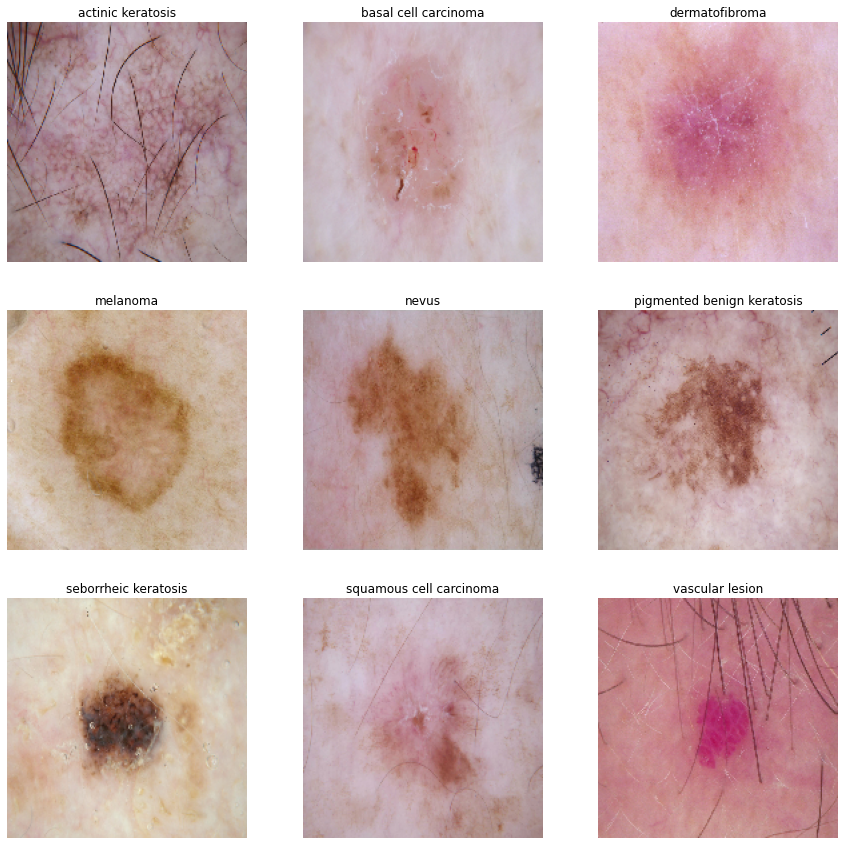

In [77]:
from tensorflow.keras.preprocessing.image import load_img
#Visualize one instance of all the class present in the dataset.

#image_dataset_from_directory() will return a tf.data.Dataset that yields batches of images from the subdirectories.
#label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes), representing a one-hot encoding of the class index.
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#all the classes of Skin Cancer
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))
    
#Visualize image 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [78]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [79]:
### Your code goes here
import tensorflow as tf
from tensorflow.keras import layers, models

# Define input shape
input_shape = (180, 180, 3)
### Your code goes here
model = tf.keras.Sequential([
    # Rescale pixel values to [0, 1]
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation function
    layers.Conv2D(32, (3, 3), activation='relu'),
    # Max pooling layer with 2x2 pool size
    layers.MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation function
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer with 2x2 pool size
    layers.MaxPooling2D((2, 2)),
    # Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation function
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Max pooling layer with 2x2 pool size
    layers.MaxPooling2D((2, 2)),
    # Flatten the output of the previous layer
    layers.Flatten(),
    # Fully connected layer with 512 units and ReLU activation function
    layers.Dense(512, activation='relu'),
    # Dropout layer to prevent overfitting
    layers.Dropout(0.5),
    # Output layer with 9 units and softmax activation function
    layers.Dense(9, activation='softmax')
])



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [80]:
### Todo, choose an appropirate optimiser and loss function
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [81]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 41, 41, 128)      

### Train the model

In [82]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 24s 107ms/step - loss: 2.0823 - accuracy: 0.2363 - val_loss: 2.1652 - val_accuracy: 0.1441
Epoch 2/20
70/70 [==============================] - 3s 38ms/step - loss: 1.6990 - accuracy: 0.3801 - val_loss: 2.0549 - val_accuracy: 0.2797
Epoch 3/20
70/70 [==============================] - 3s 37ms/step - loss: 1.5292 - accuracy: 0.4515 - val_loss: 2.1388 - val_accuracy: 0.3305
Epoch 4/20
70/70 [==============================] - 3s 37ms/step - loss: 1.4393 - accuracy: 0.5002 - val_loss: 2.1346 - val_accuracy: 0.3051
Epoch 5/20
70/70 [==============================] - 3s 36ms/step - loss: 1.3807 - accuracy: 0.5163 - val_loss: 2.1431 - val_accuracy: 0.3390
Epoch 6/20
70/70 [==============================] - 3s 38ms/step - loss: 1.3742 - accuracy: 0.5243 - val_loss: 2.1939 - val_accuracy: 0.3051
Epoch 7/20
70/70 [==============================] - 3s 37ms/step - loss: 1.2785 - accuracy: 0.5422 - val_loss: 2.0398 - val_accuracy: 0.3729
Epoch 8/20


### Visualizing training results

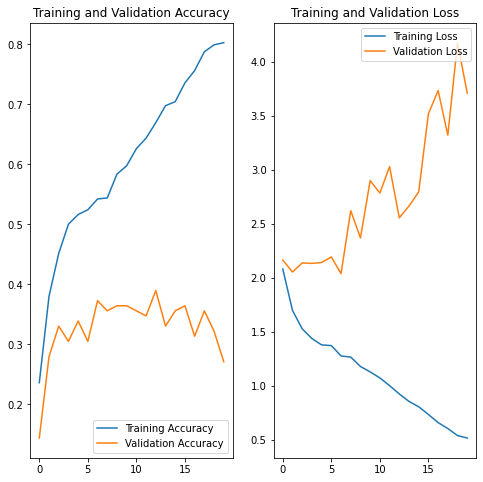

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here

Findings: training accuracy is increasing whereas the validation accuracy is not improving.
This is a clear cut case of overfitting.

In [ ]:
# **Todo:** Find the distribution of classes in the training dataset.
# **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [89]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

	

,Class,No. of Image
0,actinic keratosis,114
1,squamous cell carcinoma,181
2,nevus,357
3,melanoma,438
4,dermatofibroma,95
5,seborrheic keratosis,77
6,basal cell carcinoma,376
7,vascular lesion,139
8,pigmented benign keratosis,462


### Visualizing the results

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

<Axes: xlabel='No. of Image', ylabel='Class'>

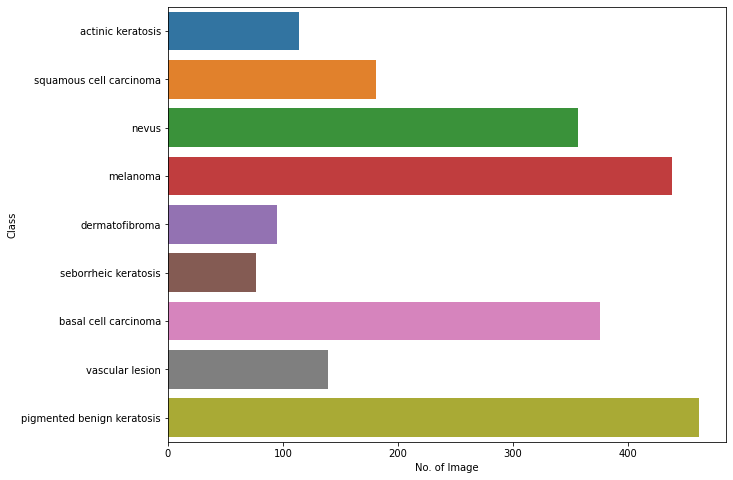

In [85]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
#!pip install Augmentor

In [88]:
path_to_training_dataset="/content/gdrive/MyDrive/Melanoma Folder/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Folder/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFFF36E9AF0>: 100%|██████████| 500/500 [00:22<00:00, 22.57 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Folder/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EFFF0DC5FA0>: 100%|██████████| 500/500 [00:19<00:00, 25.54 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Folder/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFFEC333B50>: 100%|██████████| 500/500 [00:22<00:00, 22.60 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Folder/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7EFFEC2490A0>: 100%|██████████| 500/500 [01:41<00:00,  4.95 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Folder/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7EFFF366AE80>: 100%|██████████| 500/500 [01:37<00:00,  5.15 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Folder/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0081E62910>: 100%|██████████| 500/500 [00:19<00:00, 25.04 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Folder/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EFFF0F377C0>: 100%|██████████| 500/500 [00:49<00:00, 10.16 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Folder/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFFF0EC4E20>: 100%|██████████| 500/500 [00:19<00:00, 25.02 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Folder/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFFF0AE6EB0>: 100%|██████████| 500/500 [00:22<00:00, 22.44 Samples/s]


In [90]:

#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)


6725


### Lets see the distribution of augmented data after adding new images to the original training data.

In [101]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Melanoma Folder/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030826.jpg_8c551303-8747-4adf-9f96-b6616529e275.jpg',
 '/content/gdrive/MyDrive/Melanoma Folder/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027562.jpg_0f22ffa3-f628-4650-b55e-415375470735.jpg',
 '/content/gdrive/MyDrive/Melanoma Folder/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029460.jpg_f195db86-6fa5-4091-8e8d-cfbe33ef74eb.jpg',
 '/content/gdrive/MyDrive/Melanoma Folder/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029309.jpg_8de1927a-908e-4eee-b985-58fe2caab0cd.jpg',
 '/content/gdrive/MyDrive/Melanoma Folder/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030730.jpg_cab33e34-af6e-4ff7-aa84-8e7298eb9cde.jpg',
 '/content/gdrive/MyDrive/Melanoma Folder/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028517.jpg_084239b2-281a-405f-80bd-f201fae6523e.jpg',
 '/content/gdrive/MyDrive/Melanoma Folde

In [102]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [104]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [106]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [112]:
df2.Label.value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Todo:
### Create the model, compile and train the model


In [91]:
# train dataset 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

#label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes),
#representing a one-hot encoding of the class index.

Found 8964 files belonging to 9 classes.
Using 7172 files for training.


In [92]:
# validation dataset 
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 8964 files belonging to 9 classes.
Using 1792 files for validation.


In [93]:
#tf.data.experimental.AUTOTUNE defines appropriate number of processes that are free for working.

#`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

#`Dataset.prefetch()` overlaps data preprocessing and model execution while training.


AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [94]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer  
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 41, 41, 128)      

### Compiling the model

In [96]:


#Compile the Model

#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)



### Training the model

In [116]:
## Your code goes here, note: train your model for 20 epochs
# Train the model
epochs = 30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/30
224/225 [============================>.] - ETA: 0s - loss: 0.1982 - accuracy: 0.9223
Epoch 1: val_accuracy did not improve from 0.88225
225/225 [==============================] - 12s 52ms/step - loss: 0.1985 - accuracy: 0.9221 - val_loss: 0.5604 - val_accuracy: 0.8622
Epoch 2/30
225/225 [==============================] - ETA: 0s - loss: 0.1961 - accuracy: 0.9236
Epoch 2: val_accuracy did not improve from 0.88225
225/225 [==============================] - 12s 52ms/step - loss: 0.1961 - accuracy: 0.9236 - val_loss: 0.5831 - val_accuracy: 0.8605
Epoch 3/30
225/225 [==============================] - ETA: 0s - loss: 0.1867 - accuracy: 0.9250
Epoch 3: val_accuracy did not improve from 0.88225
225/225 [==============================] - 12s 52ms/step - loss: 0.1867 - accuracy: 0.9250 - val_loss: 0.5025 - val_accuracy: 0.8711
Epoch 4/30
225/225 [==============================] - ETA: 0s - loss: 0.1707 - accuracy: 0.9320
Epoch 4: val_accuracy did not improve from 0.88225
225/225 [====

#### **Todo**: Train the model on the data created using Augmentor

#### **Todo:**  Visualize the model results

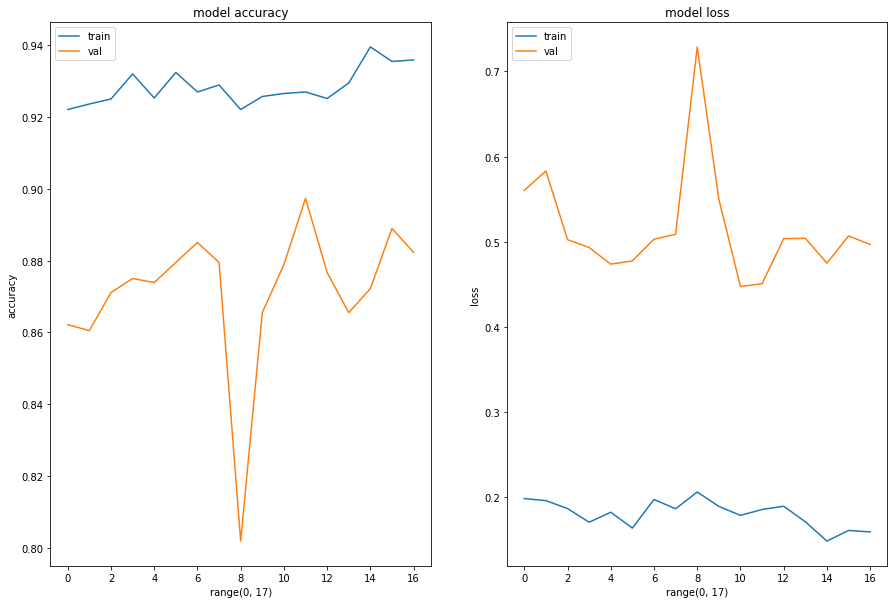

In [117]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [100]:
#Yes, Class rebalance helped improved the results. After rebalancing, train accuracy is 88% and Validation accuracy is 86%. 
#Rebalacing helped us to address the overfitting and improved the accuracy. 

In [ ]:
#THANK YOU